In [45]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [46]:
allergy_request = pd.read_csv("data/food-allergy-analysis-Zenodo.csv")
allergy_request.head()

,SUBJECT_ID,BIRTH_YEAR,GENDER_FACTOR,RACE_FACTOR,ETHNICITY_FACTOR,PAYER_FACTOR,ATOPIC_MARCH_COHORT,AGE_START_YEARS,AGE_END_YEARS,SHELLFISH_ALG_START,...,CASHEW_ALG_END,ATOPIC_DERM_START,ATOPIC_DERM_END,ALLERGIC_RHINITIS_START,ALLERGIC_RHINITIS_END,ASTHMA_START,ASTHMA_END,FIRST_ASTHMARX,LAST_ASTHMARX,NUM_ASTHMARX
0,1,2006,S1 - Female,R1 - Black,E0 - Non-Hispanic,P1 - Medicaid,False,0.093087,3.164956,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1994,S1 - Female,R0 - White,E0 - Non-Hispanic,P0 - Non-Medicaid,False,12.232717,18.880219,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.262834,18.880219,2.0
2,3,2006,S0 - Male,R0 - White,E1 - Hispanic,P0 - Non-Medicaid,True,0.010951,6.726899,NaN,...,NaN,4.884326,NaN,3.917864,6.157426,5.127995,NaN,1.404517,6.157426,4.0
3,4,2004,S0 - Male,R4 - Unknown,E1 - Hispanic,P0 - Non-Medicaid,False,2.398357,9.111567,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2006,S1 - Female,R1 - Black,E0 - Non-Hispanic,P0 - Non-Medicaid,False,0.013689,6.193018,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
allergy_request.describe()

,SUBJECT_ID,BIRTH_YEAR,AGE_START_YEARS,AGE_END_YEARS,SHELLFISH_ALG_START,SHELLFISH_ALG_END,FISH_ALG_START,FISH_ALG_END,MILK_ALG_START,MILK_ALG_END,...,CASHEW_ALG_END,ATOPIC_DERM_START,ATOPIC_DERM_END,ALLERGIC_RHINITIS_START,ALLERGIC_RHINITIS_END,ASTHMA_START,ASTHMA_END,FIRST_ASTHMARX,LAST_ASTHMARX,NUM_ASTHMARX
count,333200.000000,333200.000000,333200.000000,333200.000000,5246.000000,1051.000000,1796.000000,527.000000,7289.000000,4580.000000,...,121.000000,49515.000000,41732.000000,55567.000000,25326.000000,63874.000000,25465.000000,117550.000000,117550.000000,117550.000000
mean,166600.500000,2001.261191,3.942140,10.336654,8.724076,6.431159,6.628690,5.337775,3.287408,2.473547,...,5.293306,4.282436,5.665702,7.275146,12.930347,5.979887,12.377142,6.439342,8.943442,5.298477
std,96186.699184,6.603479,4.646174,5.623426,5.273093,4.475387,5.015358,4.190826,4.098283,3.108223,...,3.821768,4.683577,5.016386,4.190266,4.292382,4.390784,4.895197,4.863507,5.284163,6.486661
min,1.000000,1983.000000,-4.312115,1.002053,0.093087,0.169747,0.076660,0.076660,-60.112252,-4.008214,...,0.112252,-103.961670,0.013689,-95.238877,2.488706,1.002053,3.003422,1.002053,1.002053,1.000000
25%,83300.750000,1996.000000,0.021903,5.289528,3.975359,2.620123,2.235455,1.934292,0.747433,0.561259,...,2.335387,0.654346,1.448323,3.912389,9.591376,2.165640,8.139630,2.105407,4.298426,1.000000
50%,166600.500000,2002.000000,1.763176,10.193018,8.361396,5.305955,5.156742,3.939767,1.420945,1.200548,...,4.383299,2.255989,4.112252,6.721424,13.199179,4.807666,12.539357,5.023956,8.268309,3.000000
75%,249900.250000,2007.000000,7.208761,15.616701,13.078029,9.609856,10.251198,7.885010,4.295688,2.997947,...,7.227926,6.811773,8.926078,10.220397,16.579740,9.095140,16.843258,10.012320,13.341547,7.000000
max,333200.000000,2012.000000,17.984942,18.997947,24.298426,18.778919,22.499658,18.962355,25.431896,17.911020,...,17.264887,23.342916,24.626968,23.649555,28.616016,23.649555,28.522930,18.997947,18.997947,118.000000


In [48]:
#drop non food allergies
food_allergy = allergy_request.drop(columns=["FIRST_ASTHMARX","LAST_ASTHMARX","ASTHMA_END","ASTHMA_START","ALLERGIC_RHINITIS_END","ALLERGIC_RHINITIS_START","ATOPIC_DERM_END","ATOPIC_DERM_START"], axis=1)
food_allergy.head()

,SUBJECT_ID,BIRTH_YEAR,GENDER_FACTOR,RACE_FACTOR,ETHNICITY_FACTOR,PAYER_FACTOR,ATOPIC_MARCH_COHORT,AGE_START_YEARS,AGE_END_YEARS,SHELLFISH_ALG_START,...,PISTACH_ALG_END,ALMOND_ALG_START,ALMOND_ALG_END,BRAZIL_ALG_START,BRAZIL_ALG_END,HAZELNUT_ALG_START,HAZELNUT_ALG_END,CASHEW_ALG_START,CASHEW_ALG_END,NUM_ASTHMARX
0,1,2006,S1 - Female,R1 - Black,E0 - Non-Hispanic,P1 - Medicaid,False,0.093087,3.164956,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1994,S1 - Female,R0 - White,E0 - Non-Hispanic,P0 - Non-Medicaid,False,12.232717,18.880219,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,3,2006,S0 - Male,R0 - White,E1 - Hispanic,P0 - Non-Medicaid,True,0.010951,6.726899,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
3,4,2004,S0 - Male,R4 - Unknown,E1 - Hispanic,P0 - Non-Medicaid,False,2.398357,9.111567,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2006,S1 - Female,R1 - Black,E0 - Non-Hispanic,P0 - Non-Medicaid,False,0.013689,6.193018,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
# find the columns in the dataset
print(df.columns)

Index(['SUBJECT_ID', 'BIRTH_YEAR', 'GENDER_FACTOR', 'RACE_FACTOR',
       'ETHNICITY_FACTOR', 'PAYER_FACTOR', 'ATOPIC_MARCH_COHORT',
       'AGE_START_YEARS', 'AGE_END_YEARS', 'SHELLFISH_ALG_START',
       'SHELLFISH_ALG_END', 'FISH_ALG_START', 'FISH_ALG_END', 'MILK_ALG_START',
       'MILK_ALG_END', 'SOY_ALG_START', 'SOY_ALG_END', 'EGG_ALG_START',
       'EGG_ALG_END', 'WHEAT_ALG_START', 'WHEAT_ALG_END', 'PEANUT_ALG_START',
       'PEANUT_ALG_END', 'SESAME_ALG_START', 'SESAME_ALG_END',
       'TREENUT_ALG_START', 'TREENUT_ALG_END', 'WALNUT_ALG_START',
       'WALNUT_ALG_END', 'PECAN_ALG_START', 'PECAN_ALG_END',
       'PISTACH_ALG_START', 'PISTACH_ALG_END', 'ALMOND_ALG_START',
       'ALMOND_ALG_END', 'BRAZIL_ALG_START', 'BRAZIL_ALG_END',
       'HAZELNUT_ALG_START', 'HAZELNUT_ALG_END', 'CASHEW_ALG_START',
       'CASHEW_ALG_END', 'ATOPIC_DERM_START', 'ATOPIC_DERM_END',
       'ALLERGIC_RHINITIS_START', 'ALLERGIC_RHINITIS_END', 'ASTHMA_START',
       'ASTHMA_END', 'FIRST_ASTHMARX', 'L

In [50]:
# Group by Birth Year and food allergies
df = pd.read_csv("data/food-allergy-analysis-Zenodo.csv")

group_cols = ['BIRTH_YEAR', 'SHELLFISH_ALG_START',
       'SHELLFISH_ALG_END', 'FISH_ALG_START', 'FISH_ALG_END', 'MILK_ALG_START',
       'MILK_ALG_END', 'SOY_ALG_START', 'SOY_ALG_END', 'EGG_ALG_START',
       'EGG_ALG_END', 'WHEAT_ALG_START', 'WHEAT_ALG_END', 'PEANUT_ALG_START',
       'PEANUT_ALG_END', 'SESAME_ALG_START', 'SESAME_ALG_END',
       'TREENUT_ALG_START', 'TREENUT_ALG_END', 'WALNUT_ALG_START',
       'WALNUT_ALG_END', 'PECAN_ALG_START', 'PECAN_ALG_END',
       'PISTACH_ALG_START', 'PISTACH_ALG_END', 'ALMOND_ALG_START',
       'ALMOND_ALG_END', 'BRAZIL_ALG_START', 'BRAZIL_ALG_END',
       'HAZELNUT_ALG_START', 'HAZELNUT_ALG_END', 'CASHEW_ALG_START',
       'CASHEW_ALG_END', 'ATOPIC_DERM_START', 'ATOPIC_DERM_END',
       'ALLERGIC_RHINITIS_START', 'ALLERGIC_RHINITIS_END', 'ASTHMA_START',
       'ASTHMA_END']
allergy_df = df[group_cols].groupby('BIRTH_YEAR').sum()
allergy_df.head(50)

,SHELLFISH_ALG_START,SHELLFISH_ALG_END,FISH_ALG_START,FISH_ALG_END,MILK_ALG_START,MILK_ALG_END,SOY_ALG_START,SOY_ALG_END,EGG_ALG_START,EGG_ALG_END,...,HAZELNUT_ALG_START,HAZELNUT_ALG_END,CASHEW_ALG_START,CASHEW_ALG_END,ATOPIC_DERM_START,ATOPIC_DERM_END,ALLERGIC_RHINITIS_START,ALLERGIC_RHINITIS_END,ASTHMA_START,ASTHMA_END
BIRTH_YEAR,,,,,,,,,,,,,,,,,,,,,
1983,0.000000,0.000000,39.753593,0.000000,22.160164,0.000000,0.000000,0.000000,22.160164,0.000000,...,0.000000,0.000000,0.000000,0.000000,17.697467,17.697467,21.399042,28.616016,42.058864,28.522930
1984,38.302533,0.000000,38.505133,0.000000,14.472279,0.000000,0.000000,0.000000,14.472279,0.000000,...,0.000000,0.000000,0.000000,0.000000,159.498973,160.284736,57.492129,82.083504,132.175222,127.504449
1985,192.292950,0.000000,105.995893,18.516085,63.564682,0.000000,17.442847,0.000000,40.539357,0.000000,...,0.000000,0.000000,0.000000,0.000000,587.310062,551.682409,684.503765,411.255305,581.656400,463.641342
1986,445.445585,17.180014,92.621492,0.000000,55.066393,0.000000,24.216290,24.216290,18.045175,0.000000,...,0.000000,0.000000,0.000000,0.000000,1086.119097,968.654346,1153.284052,720.369610,1690.677618,1331.071869
1987,524.594114,53.771389,206.913073,32.229979,125.054073,24.588638,45.034908,0.000000,91.364819,0.000000,...,0.000000,0.000000,0.000000,0.000000,2155.753593,1979.635866,3347.885010,2521.256674,4252.021903,3516.668036
1988,1015.556468,51.564682,284.104038,15.225188,295.745380,16.470910,32.594114,0.000000,120.487337,43.663244,...,0.000000,0.000000,42.072553,0.000000,3479.137577,3318.099932,6619.846680,5489.733060,7473.741273,6804.558522
1989,1568.889802,47.085558,421.045859,59.159480,525.431896,175.718001,227.414100,52.780287,339.657769,114.039699,...,35.331964,0.000000,0.000000,0.000000,5058.102669,4931.110198,10097.856263,8788.095825,11380.791239,10834.882957
1990,1888.887064,89.106092,471.307324,72.158795,754.647502,191.542779,344.536619,0.000000,339.991786,98.195756,...,17.264887,0.000000,52.574949,17.264887,6977.579740,6927.041752,14083.268994,14023.663244,15117.719370,16085.560575
1991,2608.533881,166.496920,729.314168,109.295003,815.211499,146.351814,164.342231,29.453799,436.569473,165.787817,...,56.175222,0.000000,55.830253,0.000000,8920.334018,9186.759754,17121.355236,18267.726215,17820.484600,19955.685147


In [51]:
# Group by Race and food allergies
print(df['RACE_FACTOR'].dtype)


object


In [52]:
group_cols_Race = ['RACE_FACTOR', 'SHELLFISH_ALG_START',
       'SHELLFISH_ALG_END', 'FISH_ALG_START', 'FISH_ALG_END', 'MILK_ALG_START',
       'MILK_ALG_END', 'SOY_ALG_START', 'SOY_ALG_END', 'EGG_ALG_START',
       'EGG_ALG_END', 'WHEAT_ALG_START', 'WHEAT_ALG_END', 'PEANUT_ALG_START',
       'PEANUT_ALG_END', 'SESAME_ALG_START', 'SESAME_ALG_END',
       'TREENUT_ALG_START', 'TREENUT_ALG_END', 'WALNUT_ALG_START',
       'WALNUT_ALG_END', 'PECAN_ALG_START', 'PECAN_ALG_END',
       'PISTACH_ALG_START', 'PISTACH_ALG_END', 'ALMOND_ALG_START',
       'ALMOND_ALG_END', 'BRAZIL_ALG_START', 'BRAZIL_ALG_END',
       'HAZELNUT_ALG_START', 'HAZELNUT_ALG_END', 'CASHEW_ALG_START',
       'CASHEW_ALG_END', 'ATOPIC_DERM_START', 'ATOPIC_DERM_END',
       'ALLERGIC_RHINITIS_START', 'ALLERGIC_RHINITIS_END', 'ASTHMA_START',
       'ASTHMA_END']
allergy_race_df = df[group_cols_Race].groupby('RACE_FACTOR').sum()
allergy_race_df.head(50)


,SHELLFISH_ALG_START,SHELLFISH_ALG_END,FISH_ALG_START,FISH_ALG_END,MILK_ALG_START,MILK_ALG_END,SOY_ALG_START,SOY_ALG_END,EGG_ALG_START,EGG_ALG_END,...,HAZELNUT_ALG_START,HAZELNUT_ALG_END,CASHEW_ALG_START,CASHEW_ALG_END,ATOPIC_DERM_START,ATOPIC_DERM_END,ALLERGIC_RHINITIS_START,ALLERGIC_RHINITIS_END,ASTHMA_START,ASTHMA_END
RACE_FACTOR,,,,,,,,,,,,,,,,,,,,,
R0 - White,13568.881588,2677.308693,3667.071869,1012.555784,14188.188912,7216.796715,5831.827515,2541.683778,10458.915811,5743.145791,...,1356.681725,206.737851,2271.110198,398.803559,86856.955510,90363.321013,215671.151266,172529.218344,198648.610541,162062.001369
R1 - Black,27053.834360,2990.540726,6726.817248,1370.669405,6489.459274,2598.570842,2418.945927,787.674196,6003.655031,2506.091718,...,323.296372,33.122519,815.696099,145.193703,99220.238193,117912.336756,146819.006160,126777.059548,141613.210130,124421.494867
R2 - Asian or Pacific Islander,1595.129363,430.620123,572.104038,186.422998,867.830253,513.404517,443.337440,244.684463,1272.522930,699.802875,...,106.696783,13.560575,110.863792,41.196441,6103.414100,6884.073922,7880.681725,5129.535934,6911.709788,4665.262149
R3 - Other,139.143053,53.916496,52.268309,23.811088,140.720055,75.310062,68.862423,21.667351,139.200548,50.817248,...,16.626968,6.787132,23.997262,7.367556,846.250513,871.934292,1654.264203,811.783710,1603.887748,806.822724
R4 - Unknown,3409.516769,606.762491,886.866530,219.548255,2275.715264,924.761123,814.173854,285.891855,1986.310746,977.757700,...,189.396304,49.708419,251.123888,47.928816,19017.949350,20409.399042,32232.941821,22226.360027,33181.889117,23228.347707


In [53]:
#Group by ethnicity 
group_cols_ethnicity = ['ETHNICITY_FACTOR', 'SHELLFISH_ALG_START',
       'SHELLFISH_ALG_END', 'FISH_ALG_START', 'FISH_ALG_END', 'MILK_ALG_START',
       'MILK_ALG_END', 'SOY_ALG_START', 'SOY_ALG_END', 'EGG_ALG_START',
       'EGG_ALG_END', 'WHEAT_ALG_START', 'WHEAT_ALG_END', 'PEANUT_ALG_START',
       'PEANUT_ALG_END', 'SESAME_ALG_START', 'SESAME_ALG_END',
       'TREENUT_ALG_START', 'TREENUT_ALG_END', 'WALNUT_ALG_START',
       'WALNUT_ALG_END', 'PECAN_ALG_START', 'PECAN_ALG_END',
       'PISTACH_ALG_START', 'PISTACH_ALG_END', 'ALMOND_ALG_START',
       'ALMOND_ALG_END', 'BRAZIL_ALG_START', 'BRAZIL_ALG_END',
       'HAZELNUT_ALG_START', 'HAZELNUT_ALG_END', 'CASHEW_ALG_START',
       'CASHEW_ALG_END', 'ATOPIC_DERM_START', 'ATOPIC_DERM_END',
       'ALLERGIC_RHINITIS_START', 'ALLERGIC_RHINITIS_END', 'ASTHMA_START',
       'ASTHMA_END']
allergy_ethnicity_df = df[group_cols_ethnicity].groupby('ETHNICITY_FACTOR').sum()
allergy_ethnicity_df.head()

,SHELLFISH_ALG_START,SHELLFISH_ALG_END,FISH_ALG_START,FISH_ALG_END,MILK_ALG_START,MILK_ALG_END,SOY_ALG_START,SOY_ALG_END,EGG_ALG_START,EGG_ALG_END,...,HAZELNUT_ALG_START,HAZELNUT_ALG_END,CASHEW_ALG_START,CASHEW_ALG_END,ATOPIC_DERM_START,ATOPIC_DERM_END,ALLERGIC_RHINITIS_START,ALLERGIC_RHINITIS_END,ASTHMA_START,ASTHMA_END
ETHNICITY_FACTOR,,,,,,,,,,,,,,,,,,,,,
E0 - Non-Hispanic,44462.924025,6447.290897,11528.810404,2655.671458,23127.378508,10882.691307,9248.19165,3760.424367,19033.826146,9590.381930,...,1910.839151,289.541410,3412.887064,625.831622,203057.916496,226867.707050,389521.549624,318057.702943,366246.625599,304646.321697
E1 - Hispanic,1303.581109,311.857632,376.317591,157.336071,834.535250,446.151951,328.95551,121.177276,826.778919,387.233402,...,81.859001,20.375086,59.904175,14.658453,8986.891170,9573.357974,14736.495551,9416.254620,15712.681725,10537.607118


In [54]:
#Group by Payer Factor
group_cols_Payer = ['PAYER_FACTOR', 'SHELLFISH_ALG_START',
       'SHELLFISH_ALG_END', 'FISH_ALG_START', 'FISH_ALG_END', 'MILK_ALG_START',
       'MILK_ALG_END', 'SOY_ALG_START', 'SOY_ALG_END', 'EGG_ALG_START',
       'EGG_ALG_END', 'WHEAT_ALG_START', 'WHEAT_ALG_END', 'PEANUT_ALG_START',
       'PEANUT_ALG_END', 'SESAME_ALG_START', 'SESAME_ALG_END',
       'TREENUT_ALG_START', 'TREENUT_ALG_END', 'WALNUT_ALG_START',
       'WALNUT_ALG_END', 'PECAN_ALG_START', 'PECAN_ALG_END',
       'PISTACH_ALG_START', 'PISTACH_ALG_END', 'ALMOND_ALG_START',
       'ALMOND_ALG_END', 'BRAZIL_ALG_START', 'BRAZIL_ALG_END',
       'HAZELNUT_ALG_START', 'HAZELNUT_ALG_END', 'CASHEW_ALG_START',
       'CASHEW_ALG_END', 'ATOPIC_DERM_START', 'ATOPIC_DERM_END',
       'ALLERGIC_RHINITIS_START', 'ALLERGIC_RHINITIS_END', 'ASTHMA_START',
       'ASTHMA_END']
allergy_Payer_df = df[group_cols_Payer].groupby('PAYER_FACTOR').sum()
allergy_Payer_df.head()

,SHELLFISH_ALG_START,SHELLFISH_ALG_END,FISH_ALG_START,FISH_ALG_END,MILK_ALG_START,MILK_ALG_END,SOY_ALG_START,SOY_ALG_END,EGG_ALG_START,EGG_ALG_END,...,HAZELNUT_ALG_START,HAZELNUT_ALG_END,CASHEW_ALG_START,CASHEW_ALG_END,ATOPIC_DERM_START,ATOPIC_DERM_END,ALLERGIC_RHINITIS_START,ALLERGIC_RHINITIS_END,ASTHMA_START,ASTHMA_END
PAYER_FACTOR,,,,,,,,,,,,,,,,,,,,,
P0 - Non-Medicaid,29233.494867,4761.754962,8056.495551,1940.588638,18721.311431,8901.626283,7950.428474,3279.162218,15785.848049,8089.779603,...,1705.045859,253.325120,2954.715948,543.767283,145147.156742,157605.667351,299771.268994,249829.169062,277553.251198,231782.559890
P1 - Medicaid,16533.010267,1997.393566,3848.632444,872.418891,5240.602327,2427.216975,1626.718686,602.439425,4074.757016,1887.835729,...,287.652293,56.591376,518.075291,96.722793,66897.650924,78835.397673,104486.776181,77644.788501,104406.056126,83401.368925


In [55]:
# Select columns
data = allergy_Payer_df
cols = ['SHELLFISH_ALG_START',
       'SHELLFISH_ALG_END', 'FISH_ALG_START', 'FISH_ALG_END', 'MILK_ALG_START',
       'MILK_ALG_END', 'SOY_ALG_START', 'SOY_ALG_END', 'EGG_ALG_START',
       'EGG_ALG_END', 'WHEAT_ALG_START', 'WHEAT_ALG_END', 'PEANUT_ALG_START',
       'PEANUT_ALG_END', 'SESAME_ALG_START', 'SESAME_ALG_END',
       'TREENUT_ALG_START', 'TREENUT_ALG_END', 'WALNUT_ALG_START',
       'WALNUT_ALG_END', 'PECAN_ALG_START', 'PECAN_ALG_END',
       'PISTACH_ALG_START', 'PISTACH_ALG_END', 'ALMOND_ALG_START',
       'ALMOND_ALG_END', 'BRAZIL_ALG_START', 'BRAZIL_ALG_END',
       'HAZELNUT_ALG_START', 'HAZELNUT_ALG_END', 'CASHEW_ALG_START',
       'CASHEW_ALG_END', 'ATOPIC_DERM_START', 'ATOPIC_DERM_END',
       'ALLERGIC_RHINITIS_START', 'ALLERGIC_RHINITIS_END', 'ASTHMA_START',
       'ASTHMA_END']

# Calculate averages
before = data[cols].mean(axis=0)[::2]
after = data[cols].mean(axis=0)[1::2]

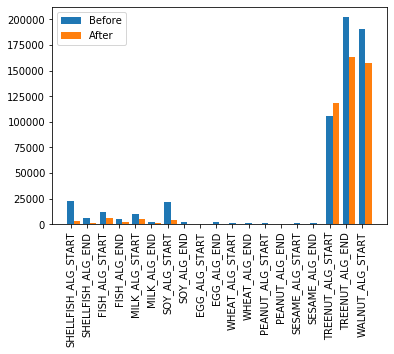

In [56]:
# Create bar graph
fig, ax = plt.subplots()
x = range(len(before))
ax.bar(x, before, width=0.4, label='Before')
ax.bar([i+0.4 for i in x], after, width=0.4, label='After')
ax.set_xticks(x)
ax.set_xticklabels(cols, rotation=90)
ax.legend()
plt.show()

In [59]:
#Create bar graph for Race
